## Estimating probabilities of events on real-world data

Dice, coins and cards are useful examples which can be used to understand the fundamental concepts of probability. Even more interesting examples are from real world - we can apply the same principles. Let us analyze the [student alcohol consumption](https://www.kaggle.com/uciml/student-alcohol-consumption/home) dataset and see what basic statistical information (estimates of probabilities of events) we can infer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read data:
data_por = pd.read_csv("student-por.csv")
data_por.head()  # pick into DataFrame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In the next example we use the following two attributes (columns of the DataFrame):
- `G3` - final grade related with the course subject (numeric: from 0 to 20, output target)  
- `studytime` - weekly study time (numeric: 1 : < 2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : > 10 hours) 

In [2]:
attributes = ["G3","studytime"]
data_por = data_por[attributes]
data_por.head()

,G3,studytime
0,11,2
1,11,2
2,12,2
3,14,3
4,13,2


The probability that a student's study-time falls in an interval can be approximated by

$${P(\text{study interval}) = \frac{\text{Number of students with this study interval}}{\text{Total number of students}}}$$

This is an emperical estimate. The larger the population (number of students involved) the precision of the estimate is better (provided that the samples are independent!).

In [3]:
# value_counts() function is very useful, 
# it provides the number of data points of each category present in the particular column:
data_temp = data_por["studytime"].value_counts()  
data_temp

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [4]:
print(data_temp.sum())
data_por.index

649


RangeIndex(start=0, stop=649, step=1)

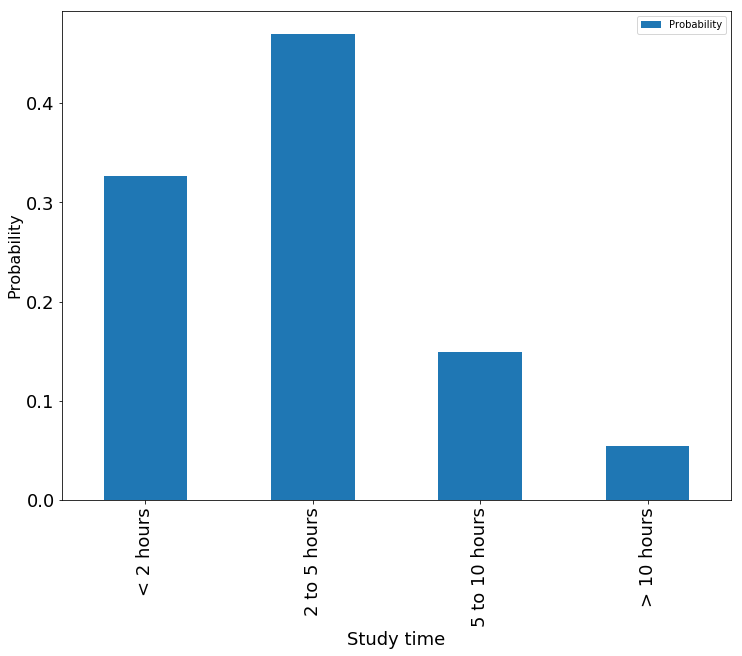

               Probability
< 2 hours         0.326656
2 to 5 hours      0.469954
5 to 10 hours     0.149461
> 10 hours        0.053929


In [5]:
P_study_time = pd.DataFrame((data_temp/data_temp.sum()).sort_index())  # sort_index() - sorts according to the row names
P_study_time.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_study_time.columns = ["Probability"]  # This DataFrame has only one column

# Now we plot these probabilities (using bar plot)
P_study_time.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Study time",fontsize=18)
plt.show()
print(P_study_time)

Let us call scores of at least 15 "high". We can construct two events "A student has high score" and "A student has low score".  The probability of a student getting a high score can be approximated by

$$P(\text{high score}) = \frac{\text{Number of students with high scores}}{\text{Total number of students}}$$

      Probability
Low      0.798151
High     0.201849


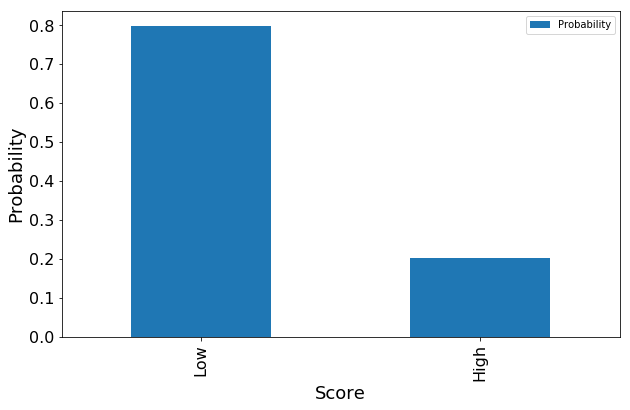

In [6]:
data_temp = (data_por["G3"]>=15).value_counts()
P_high = pd.DataFrame(data_temp/data_temp.sum())
P_high.index = ["Low","High"]
P_high.columns = ["Probability"]

print(P_high)
P_high.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

## Conditional Probability 

Very often it is advantageous to infer the probability of certain events *conditioned on* other events. In this case, we want to find probability of a certain event, if we know (conditioned on) that some other event happen. For example, we want to estimate the probability that it will rain on a particular day, if we know (conditioned on) that certain type of cloud are present. These types of problems are called [statistical classification] (https://en.wikipedia.org/wiki/Statistical_classification), and concepts such as conditional probability and Bayes rule play an important role in its solution.


Hence, we proceed with more interesting observations.Suppose we want to find the probability of the various study-intervals given (conditioned on) that the student scored high. By conditional probability, this can be calculated by:

$$P(\text{study interval}\ |\ \text{highscore})=\frac{\text{Number of students with study interval AND highscore}}{\text{Total number of students with highscore}}$$

In [7]:
# we want to extract only students with high score:
data_temp=data_por[data_por["G3"]>=15]["studytime"]
# or we can use .loc method: data_temp = data_por.loc[data_por["G3"]>=15,"studytime"]
# The result is a Series object (DataFrame with only one column is called Series)
print(data_temp)

8      2
14     3
15     1
31     2
32     2
42     2
47     4
51     2
56     2
57     2
59     2
60     2
61     1
65     2
69     4
87     3
101    3
104    2
113    1
116    2
117    1
128    1
139    3
181    2
183    2
185    2
188    2
196    2
198    2
201    2
      ..
439    1
448    3
450    2
456    2
472    1
499    1
509    2
510    2
516    2
517    1
525    3
533    2
546    2
549    2
594    2
595    1
596    2
606    4
611    3
615    2
617    3
618    2
620    2
623    3
630    3
634    2
636    2
638    2
641    3
645    2
Name: studytime, Length: 131, dtype: int64


In [8]:
print(len(data_temp))
data_temp.shape  # total number of students with high score

131


(131,)

In [9]:
data_temp.value_counts()  # among the students with high scores, we extract number of students with each studytime category

2    67
3    32
1    22
4    10
Name: studytime, dtype: int64

Probability of stude times given that the student scored high:


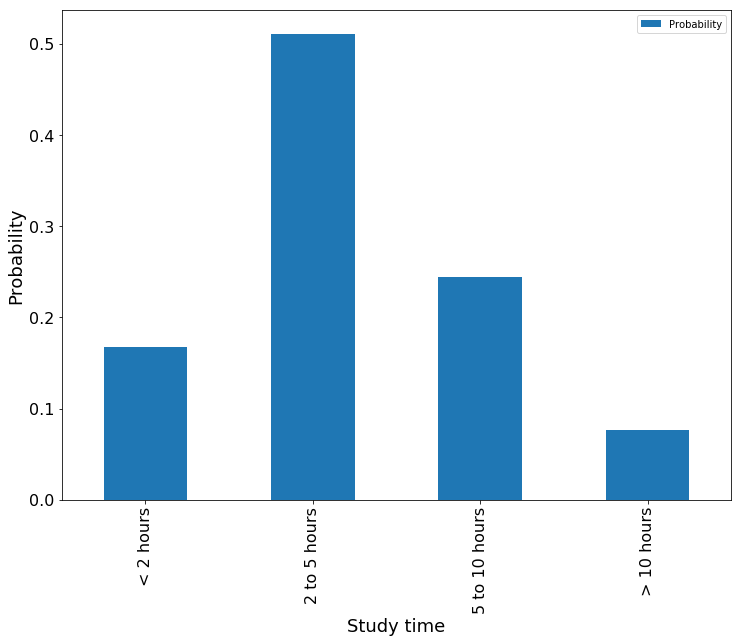

In [10]:
P_T_given_high_score= pd.DataFrame((data_temp.value_counts()/len(data_temp)).sort_index())
P_T_given_high_score.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_T_given_high_score.columns = ["Probability"]
print("Probability of stude times given that the student scored high:")

P_T_given_high_score.plot(kind='bar',figsize=(12,9),fontsize=16)
plt.xlabel("Study time",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

What if we want to **predict** the probability that a student gets a score greater than 15 given that they studied for a particular period of time . Using the estimated values we can use the **Bayes rule** to calculate this probability.

$$P(\text{student getting a highscore}\ |\  \text{study interval})=\frac{P(\text{study interval}\ |\ \text{the student scored high})P(\text{highscore})}{P(\text{study interval})}$$

Probability of high score for given study time:


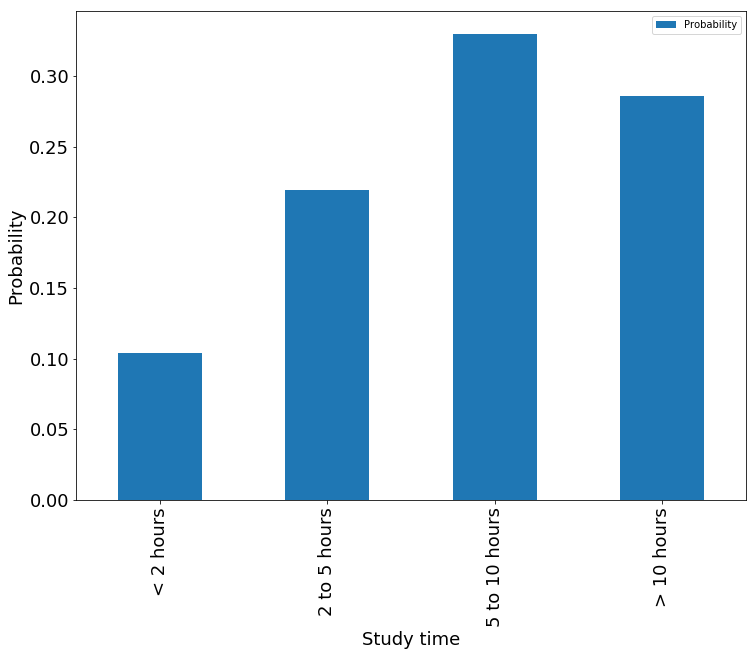

In [11]:
P_high_cond_T = P_T_given_high_score * P_high.loc["High"] / P_study_time
print("Probability of high score for given study time:")
pd.DataFrame(P_high_cond_T).plot.bar(figsize=(12,9),fontsize=18)
plt.xlabel("Study time",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

## Exrecise 1

Do the same thing on dataset 'student-mat.csv' (Mathematics class).

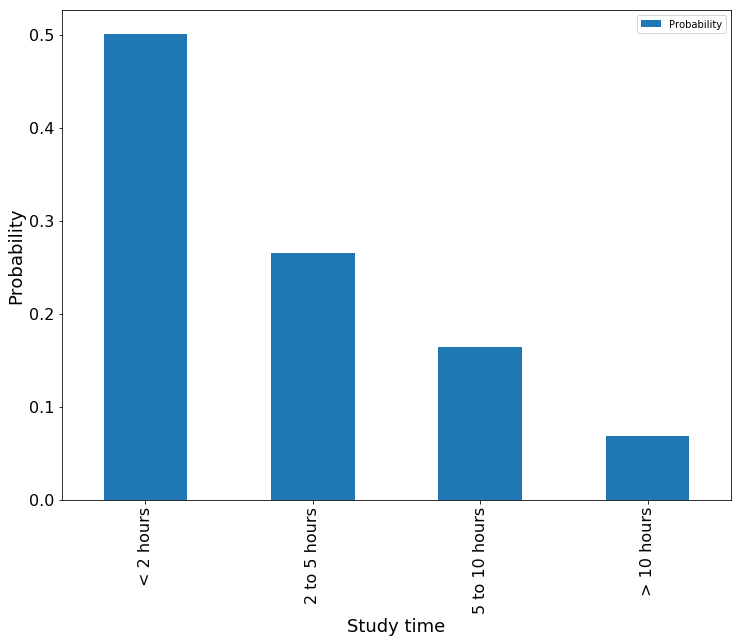

In [12]:
data_math = pd.read_csv("student-mat.csv")
data_temp = data_math["studytime"].value_counts()
P_study_time_m = pd.DataFrame(data_temp/data_temp.sum())
P_study_time_m.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_study_time_m.columns = ["Probability"]

P_study_time_m.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Study time",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

## Exercise 2

Two boxes are given: $A$ and $B$. In box $A$ we have $r_A$ red balls and $w_A$ white balls. Box $B$ has $r_B$ red and $w_B$ white balls. We randomly pick one box, and then randomly take one ball from the chosen box. Write a code which calculates conditional probability (both theoretical and statistical - generate large number of samples) that a randomly chosen ball belongs to box $A$ given that it is white. 